In [1]:
import pandas as pd
import os
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

import folium  #needed for interactive map
from folium.plugins import HeatMap

import branca

import geopandas
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame



plotsize = (15,6)


In [2]:
data_g39 = pd.read_excel(io = "./MTFF Graphs English.xlsx", sheet_name = "G 3.9.", skiprows = 28, usecols = "B:S", header = 0, nrows = 4)

data_g39.rename({"Concepto": 'KPI',
                2022 : '2022',
                 2023 : '2023',
                2024 : '2024',
                2025 : '2025',
                2026 : '2026',
                2027 : '2027',
                2028 : '2028',
                2029 : '2029',
                2030 : '2030',
                2031 : '2031',
                2032 : '2032',
                2033 : '2033',
                2034 : '2034',
                2035 : '2035'}, axis = 1, inplace = True)

print(data_g39)

                   KPI  2019  2020  2021  2022  2023  2024  2025  2026  2027  \
0             Interest   2.9   2.8   3.3   4.3   3.9   4.7   4.7   4.1   3.8   
1  Primary expenditure  15.8  20.2  19.8  17.2  19.2  18.0  18.0  18.1  18.0   
2                Total  18.7  23.1  23.1  21.5  23.1  22.8  22.7  22.2  21.8   

   2028  2029  2030  2031  2032  2033  2034  2035  
0   3.6   3.5   3.6   3.6   3.6   3.6   3.6   3.4  
1  18.0  18.2  18.2  18.4  18.5  18.8  19.0  19.2  
2  21.6  21.7  21.8  22.0  22.2  22.3  22.6  22.6  


In [3]:
data_g39_graph = pd.melt(data_g39, id_vars = ["KPI"], value_vars = ['2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035'], var_name = "Year")
data_g39_graph.rename({'value': '% GDP'}, inplace = True, axis = 1)
data_g39_graph

,KPI,Year,% GDP
0,Interest,2022,4.3
1,Primary expenditure,2022,17.2
2,Total,2022,21.5
3,Interest,2023,3.9
4,Primary expenditure,2023,19.2
5,Total,2023,23.1
6,Interest,2024,4.7
7,Primary expenditure,2024,18.0
8,Total,2024,22.8
9,Interest,2025,4.7


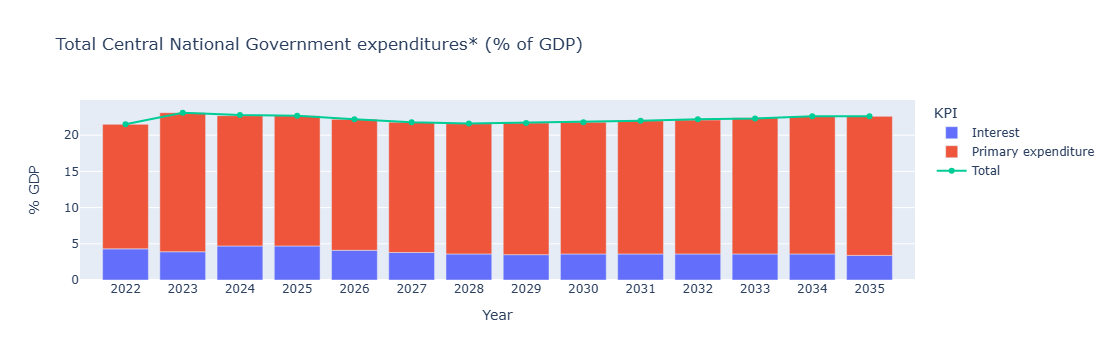

In [4]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

df = data_g39_graph.copy()

fig = px.bar(df[df.KPI != "Total"], x="Year", y="% GDP", color="KPI", title="Total Central National Government expenditures* (% of GDP)")
fig.add_trace(go.Scatter(x=df[df.KPI == "Total"]['Year'], y=df[df.KPI == "Total"]['% GDP'], name="Total"))
fig.show()

fig.write_html('./G39.html')

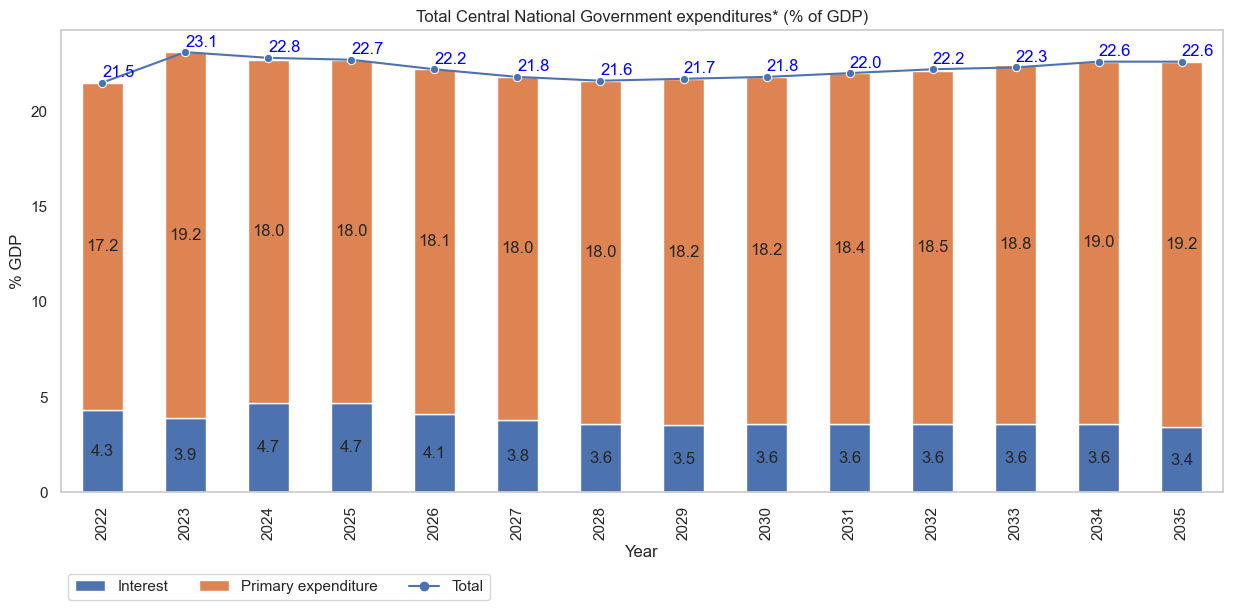

In [6]:
df = data_g39_graph[data_g39_graph.KPI != "Total"].pivot(index='Year', columns='KPI', values='% GDP')

fig, ax = plt.subplots(figsize = plotsize)

df.plot(kind='bar', stacked=True, ax=ax)

sns.lineplot(x="Year",  y="% GDP", data=data_g39_graph[data_g39_graph.KPI == "Total"], color="b", ax=ax, marker='o')
legend_line_plot = mlines.Line2D([], [], color="b", label="Total", marker='o')

df_linea = data_g39_graph[data_g39_graph.KPI == "Total"]
# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y+.3, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'blue') # set colour of line

handles, labels = ax.get_legend_handles_labels()
handles.extend([legend_line_plot])

ax.legend(handles=handles, loc='lower left', bbox_to_anchor=(0, -0.25), ncols = 3)
ax.grid(False)

plt.title("Total Central National Government expenditures* (% of GDP)")

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [np.round(v.get_height(), 1) for v in c]# [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')